In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
def linear_regress(dataset, algo, target):
    metrics = pd.read_csv(f"../{dataset}/metrics.csv").drop(["precision", "lr_acc", "auroc"], axis=1)
    X = metrics[metrics["algo"]==algo].drop(["algo", "no"], axis=1)
    
    accs = pd.read_csv(f"../{dataset}/accuracy_results.csv")
    accs = accs[accs["algo"] == algo]
    y = accs[target]
    
    clf = LinearRegression(normalize=True)
    clf.fit(X,y)
    
    return {m:abs(coef) for m, coef in zip(X.columns, clf.coef_)}
    
linear_regress("birth_randoms", "mondrian","knn_pca_auroc")

{'entropy': 0.028033854901119485,
 'cm': 0.8165505624801253,
 'dm': 0.19410080217446224,
 'discern': 0.2337893932737334,
 'ilm': 0.02260958672325873,
 'hellinger': 0.09135302195780956,
 'bivariate_corr': 0.2179239901261412,
 'avg_eq_size': 0.21519357653460863,
 'ambiguity': 1.4105061304986197,
 'granularity': 0.43932899583253265,
 'dse': 0.051368203303176374}

In [3]:
res = {}
for dataset in ["birth_randoms", "ring_randoms", "adult_randoms", "heart_randoms"]:
    for algo in ["datafly", "datafly_shuffled", "mondrian"]:
        for target in ["lr_acc", "lr_auroc", "rf_pca_acc", "rf_pca_auroc", "knn_pca_acc", "knn_pca_auroc"]:
            res[(dataset, algo, target)] = linear_regress(dataset, algo, target)    

In [4]:
df = pd.DataFrame.from_dict(res, orient="index")
df

entropy            cm  \
birth_randoms datafly  lr_acc         8.528978e-01  8.690565e-02   
                       lr_auroc       2.938380e-01  4.117815e-01   
                       rf_pca_acc     3.307605e-02  7.187166e-01   
                       rf_pca_auroc   1.063506e+00  1.253654e+00   
                       knn_pca_acc    1.631276e+00  1.261122e+00   
...                                            ...           ...   
heart_randoms mondrian lr_auroc       1.072277e+00  4.351433e-01   
                       rf_pca_acc     8.790836e-08  7.982841e-07   
                       rf_pca_auroc   4.214125e-02  6.241980e-01   
                       knn_pca_acc    6.164589e-02  1.546704e-01   
                       knn_pca_auroc  1.199929e+00  3.427697e-02   

                                                dm      discern           ilm  \
birth_randoms datafly  lr_acc         2.654239e-01     0.116018  1.823840e+00   
                       lr_auroc       3.775230e-02     0.019582  3.068659e+00   
                       rf_pca_acc     1.673258e-01     0.103478  1.995582e+00   
                       rf_pca_auroc   4.032134e-01     0.005831  6.006435e+00   
                       knn_pca_acc    6.392435e-01     0.163822  2.173558e+00   
...                                            ...          ...           ...   
heart_randoms mondrian lr_auroc       3.069006e-01   433.080375  2.824106e-01   
                       rf_pca_acc     3.286445e-08     0.000554  6.976823e-07   
                       rf_pca_auroc   1.687996e-01    63.570712  8.640051e-01   
                       knn_pca_acc    1.087018e-02   453.833464  7.338839e-01   
                       knn_pca_auroc  8.830695e-02  2496.581482  4.226102e+00   

                                         hellinger  bivariate_corr  \
birth_randoms datafly  lr_acc         2.426083e-01    1.926066e-02   
                       lr_auroc       1.451180e-02    2.528543e-02   
                       rf_pca_acc     8.979097e-02    9.750518e-03   
                       rf_pca_auroc   2.319367e-01    3.385307e-02   
                       knn_pca_acc    1.022002e-01    5.579229e-04   
...                                            ...             ...   
heart_randoms mondrian lr_auroc       6.348940e-02    5.943697e-01   
                       rf_pca_acc     1.457736e-08    7.597561e-07   
                       rf_pca_auroc   4.349779e-02    1.590981e-01   
                       knn_pca_acc    1.018358e-02    6.683778e-02   
                       knn_pca_auroc  1.809763e-02    1.878094e-01   

                                      avg_eq_size   ambiguity  granularity  \
birth_randoms datafly  lr_acc            0.061344    0.254067     6.197961   
                       lr_auroc          0.312864    0.749242     3.534780   
                       rf_pca_acc        0.149756    0.004431     2.813468   
                       rf_pca_auroc      0.675237    0.963902    10.771566   
                       knn_pca_acc       0.990224    0.696810     6.637666   
...                                           ...         ...          ...   
heart_randoms mondrian lr_auroc        486.479681   21.603301     5.518283   
                       rf_pca_acc        0.000571    0.000005     0.000003   
                       rf_pca_auroc    153.447134  102.236533     0.914622   
                       knn_pca_acc     488.680266   11.219318     1.617624   
                       knn_pca_auroc  2656.868798   75.436479     6.174898   

                                               dse  
birth_randoms datafly  lr_acc         6.303437e-01  
                       lr_auroc       4.906932e-01  
                       rf_pca_acc     4.074482e-02  
                       rf_pca_auroc   2.278210e-01  
                       knn_pca_acc    2.204200e+00  
...                                            ...  
heart_randoms mondrian lr_auroc       5.602516e-01  
                       rf_pca_acc     1.981515e-07 

In [5]:
win_count = {c:0 for c in df.columns}

for i in range(len(df)):
    max_val =0
    max_met = ""
    
    for c in df.columns:
        if df.iloc[i][c] > max_val:
            max_val = df.iloc[i][c]
            max_met = c
    win_count[max_met] += 1
win_count

{'entropy': 0,
 'cm': 3,
 'dm': 0,
 'discern': 0,
 'ilm': 7,
 'hellinger': 2,
 'bivariate_corr': 0,
 'avg_eq_size': 18,
 'ambiguity': 6,
 'granularity': 28,
 'dse': 8}

In [6]:
win_count = {k: v for k, v in sorted(win_count.items(), key=lambda item: item[1], reverse=True)}


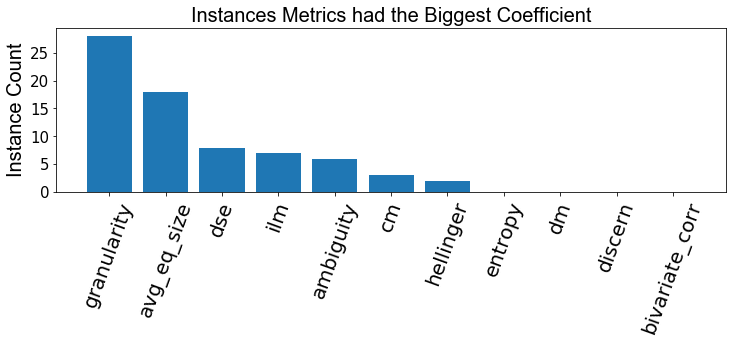

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Instance Count", fontsize=20, fontname='Arial')
plt.bar(win_count.keys(), win_count.values(), label=win_count.keys())
plt.title("Instances Metrics had the Biggest Coefficient", fontsize=20, fontname="Arial")
plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig("linear_regression_highest_counts.png")